C:\Users\Ankit Pandey\AppData\Local\Temp\ipykernel_3668\447758777.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')
  CustomerID  TotalValue  Quantity       Price
0      C0001     3354.52        12  278.334000
1      C0002     1862.74        10  208.920000
2      C0003     2725.38        14  195.707500
3      C0004     5354.88        23  240.636250
4      C0005     2034.24         7  291.603333


D:\BOOKS\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\BOOKS\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


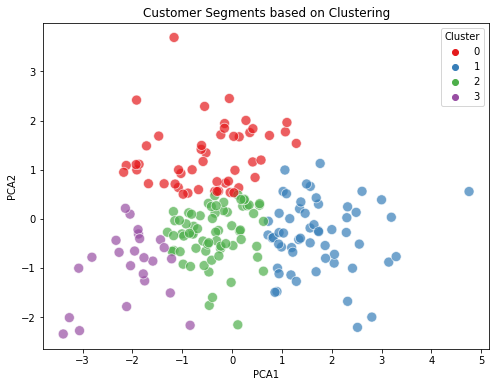

Davies-Bouldin Index: 0.9448437495439578
Silhouette Score: 0.33071125179757666


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

html_content = """
<h1>Task 3 : Customer Segmentation Using Clustering</h1>

<p>This analysis performs customer segmentation using clustering techniques, combining customer profile and transaction data. The goal is to group customers based on similar behaviors to enable targeted marketing strategies. We apply the KMeans algorithm and evaluate the results using clustering metrics such as the Davies-Bouldin Index.</p>
"""

display(HTML(html_content))

# Load the data (replace with actual file paths)
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge customer profile and transaction data
data = transactions.merge(customers, on="CustomerID", how="left")

# Check the columns in the merged data
print(data.columns)

# Modify the aggregation based on available columns
if 'Category' in data.columns:
    customer_profile = data.groupby("CustomerID").agg({
        "TotalValue": "sum",   # Total spending
        "Quantity": "sum",     # Total quantity purchased
        "Price": "mean",       # Average product price
        "Category": lambda x: ','.join(x.unique()),  # Unique product categories
    }).reset_index()
else:
    customer_profile = data.groupby("CustomerID").agg({
        "TotalValue": "sum",   # Total spending
        "Quantity": "sum",     # Total quantity purchased
        "Price": "mean",       # Average product price
    }).reset_index()

# Check the resulting customer profile data
print(customer_profile.head())

# Standardize the features
scaler = StandardScaler()
features = customer_profile[["TotalValue", "Quantity", "Price"]]
scaled_features = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction (optional, for visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Choose the number of clusters (let's use KMeans for clustering)
kmeans = KMeans(n_clusters=4, random_state=42)  # You can try different numbers of clusters
customer_profile['Cluster'] = kmeans.fit_predict(scaled_features)

# Add PCA components for visualization
customer_profile['PCA1'] = pca_components[:, 0]
customer_profile['PCA2'] = pca_components[:, 1]

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments based on Clustering')
plt.show()

# Evaluate clustering performance using Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(scaled_features, customer_profile['Cluster'])
silhouette = silhouette_score(scaled_features, customer_profile['Cluster'])

# Print clustering metrics
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')

# Save the clustered data to a new CSV file (optional)
customer_profile.to_csv('Customer_Segmentation_Clusters.csv', index=False)
